# Data formats and open data
**Exercises for week 5B** in Digital Methods, University of Copenhagen

## 1. HTML

HTML is the markup language used by web pages. It's ubiquitous on the web; even when editing this notebook you are interacting with HTML (right click and hit "View Page Source" if you need proof). Here follows some exercises to get you comfortable with navigating HTML on web pages.

> **Ex. 1**: Right click inside the cell below and hit "Inspect". This should launch the "Inspector" tool in your browser, showing you where the element that renders the cell sits inside the DOM.
1. How deeply is it nested? Are there any sibling elements? We counted seven parents and three siblings
2. What happens when you update it? Change the text and see for yourself.
>
> *Hint: Most modern browsers (e.g. Firefox, Chrome, Brave) will let you hover elements in the DOM to show where they display on the web page.*

*HTML is a beautiful soup of hypertext!*

> **Ex. 2**: In the HTML code below:
1. What is typically the use of the `<p>`, `<h1>` and `<h2>` tags? Look them up, what are they for?
2. What are the attributes of the `div` element?
3. Create a text file that ends with ".html" and open it in a browser.

    <html>
    <body>

    <div width=200 height=100 id="main">
        <h1>This is the main title of the webpage</h1>
        <h2>This is a sub-heading</h2>
        <p>This is a paragraph of text.</p>
    </div>

    <h2>This is another sub-heading</h2>
    <p>This is a paragraph of text with some words in bold.</p>
    <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmedia.giphy.com%2Fmedia%2FkFgzrTt798d2w%2Fgiphy.gif&f=1&nofb=1" width="493" height="340">
    <p>And that just above is an image.</p>

    </body>
    </html>


> **Ex. 3**: Using the `requests` module, download [this web page](https://www.boliga.dk/resultat?propertyType=3&zipCodes=2200&page=1). Print the first 100 lines of the html string. How many lines are there in total?
>
> *Hint: use the `requests.get` method. To figure out how it works, execute `?requests.get` (after importing `requests`), this displays the module documentation.*

In [10]:
from bs4 import BeautifulSoup
import requests as rq
url="https://www.boliga.dk/resultat?propertyType=3&zipCodes=2200&page=1"
r=rq.get(url).text

In [11]:
len(r)

672858

In [12]:
splitted=r.split('\n')

In [13]:
len(splitted) #is the number of lines!

2368

In [14]:
splitted[2]

"  <script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':"

In [15]:
er_det_hundrede=splitted[0:100]

In [16]:
len(er_det_hundrede)

100

In [17]:
#if you want to solve the assignment, write
#print(er_det_hundrede)

## 1.2 Scraping

*Scraping* means to parse HTML and collect the important pieces of information inside. *Crawling* is
another important contect, and the word refers to automatically sifting through pages of the web and scraping
information on each page. 90% of scraping and crawling work can be done using the two modules `requests` and
`BeautifulSoup`.

> **Ex. 4:** Load the toy example HTML with BeautifulSoup. Use the [documentation page](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for reference on how to do this.
1. Access the `h1` element inside the `div` and print out its content (which is "This is the main title of the webpage").
2. Get the value of the `src` attribute inside the `img` element.
3. Get the second subheading that contains "This is another sub-heading" and print out that content.
4. Get the `div` element by searching for its id.

In [18]:
import requests as rq
url1="""    <html>
    <body>

    <div width=200 height=100 id="main">
        <h1>This is the main title of the webpage</h1>
        <h2>This is a sub-heading</h2>
        <p>This is a paragraph of text.</p>
    </div>

    <h2>This is another sub-heading</h2>
    <p>This is a paragraph of text with some words in bold.</p>
    <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmedia.giphy.com%2Fmedia%2FkFgzrTt798d2w%2Fgiphy.gif&f=1&nofb=1" width="493" height="340">
    <p>And that just above is an image.</p>

    </body>
    </html>

</html>"""
soup=BeautifulSoup(url1,"html.parser")

In [19]:
print(soup.prettify())

<html>
 <body>
  <div height="100" id="main" width="200">
   <h1>
    This is the main title of the webpage
   </h1>
   <h2>
    This is a sub-heading
   </h2>
   <p>
    This is a paragraph of text.
   </p>
  </div>
  <h2>
   This is another sub-heading
  </h2>
  <p>
   This is a paragraph of text with some words in bold.
  </p>
  <img height="340" src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmedia.giphy.com%2Fmedia%2FkFgzrTt798d2w%2Fgiphy.gif&amp;f=1&amp;nofb=1" width="493"/>
  <p>
   And that just above is an image.
  </p>
 </body>
</html>



In [20]:
soup.h1.string #Assignment 1

'This is the main title of the webpage'

In [21]:
soup.img["src"] #sweet, assignment 2

'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmedia.giphy.com%2Fmedia%2FkFgzrTt798d2w%2Fgiphy.gif&f=1&nofb=1'

In [22]:
soup.find_all("h2")[1] #boojaaaa assignment 3

<h2>This is another sub-heading</h2>

In [23]:
soup.find(id="main") #assignment 4

<div height="100" id="main" width="200">
<h1>This is the main title of the webpage</h1>
<h2>This is a sub-heading</h2>
<p>This is a paragraph of text.</p>
</div>

> **Ex. 5** Load the HTML you downloaded in Ex. 3. For each post, extract price, square meter size and "Ejerudgift". You should create three different lists that contain each variable across posts.

In [24]:
import requests as rq
from bs4 import BeautifulSoup
#... to begin our work with online material and BeautifulSoup!

In [25]:
#Our link was called r:
soup2=BeautifulSoup(r,"html.parser")

In [26]:
#I found something attached to every price - a class instead of an id!
#However, only class_ instead of class works here in python and we therefore find it like this:
soup2.find_all(class_="primary-value d-flex justify-content-end")

[<div _ngcontent-sc51="" class="primary-value d-flex justify-content-end"><app-tooltip _ngcontent-sc51="" _nghost-sc39="" class="ml-2 md-right d-flex"><!-- --><p _ngcontent-sc39="" class="app-tooltip"><!-- --><!-- --> Pris er faldet <!-- --><!-- --></p><!-- --><app-badge _ngcontent-sc51="" _nghost-sc15="" aria-describedby="cdk-describedby-message-90245" cdk-describedby-host="" class="px-3"><span _ngcontent-sc15="" class="badge secondary small"> -5% </span></app-badge><!-- --></app-tooltip> 1.795.000 kr. </div>,
 <div _ngcontent-sc51="" class="primary-value d-flex justify-content-end"><app-tooltip _ngcontent-sc51="" _nghost-sc39="" class="ml-2 md-right d-flex"><!-- --><p _ngcontent-sc39="" class="app-tooltip"><!-- --><!-- --> Pris er faldet <!-- --><!-- --></p><!-- --></app-tooltip> 7.250.000 kr. </div>,
 <div _ngcontent-sc51="" class="primary-value d-flex justify-content-end"><app-tooltip _ngcontent-sc51="" _nghost-sc39="" class="ml-2 md-right d-flex"><!-- --><p _ngcontent-sc39="" clas

In [27]:
#VI DROPPER FUNKTIONER
import re
Prices=soup2.find_all(class_="primary-value d-flex justify-content-end")
Prices_list=[]
for element in Prices:
    Prices_list.append(element)
    #for at gøre den mere samarbejdsvillig som liste
#I've changed my mind - it's better to use this as a string in order to use findall() later
#(which is only available to strings)
pricestring=str(Prices)

In [28]:
#type pricestring if you want to see how the messy string looks

In [29]:
#Defining the object we want to find with the re-module:
#which is a whitespace+one number (only for things below 10 mio+dot+numbers+dot+numbers
number=re.compile("(\s\d+?.\d+\.\d+)")
numbershort=re.compile("(\s\d+?.\d+)")

In [30]:
clean_prices=numbershort.findall(pricestring)

In [31]:
boligprisliste=number.findall(pricestring)
#boligprisliste
#length of boligprisliste is 52 -> len(boligprisliste)

In [32]:
#testing to get some clear numbers
udendotliste=[]
for element in boligprisliste:
    element.replace(".","")
    udendotliste.append(element)

In [33]:
udendots=str(boligprisliste)
udendot=udendots.replace(".","")

In [34]:
tal=re.compile("\d{7}")
tallisten=tal.findall(udendot)

In [35]:
#type tallisten to see how it looks like
tallisten[1]

'7250000'

In [36]:
#btw class gives error, better to use class_

In [37]:
#WE FINALLY HAVE THE PRICESSSSS IN A LIST - no function necessary!

In [38]:
#Nu til kvadratmeter:
#find_all("div"[13]) måske
#<span _ngcontent-boliga-app-c46="" class="text-nowrap">47 m²</span>

In [39]:
import re
collectionscrap=soup2.find_all("app-house-details")
meters=re.compile("\d+\s")
#so now, after defining the stuff, lets take the specific details for meters in to a list

In [40]:
#one element of the collectionscrap
collectionscrap[1]

<app-house-details _ngcontent-sc51="" _nghost-sc54="" class="flex-grow-1"><div _ngcontent-sc54="" class="house-details-blocks"><!-- --><div _ngcontent-sc54="" class="detail d-lg-flex"><app-tooltip _ngcontent-sc54="" _nghost-sc39="" class="tooltip-nowrap tooltip-top-left w-100"><!-- --><div _ngcontent-sc54="" class="d-flex flex-wrap pr-1"><svg _ngcontent-sc54="" class="icon-2 text-secondary"><use _ngcontent-sc54="" xlink:href="#icon-rooms"></use></svg><span _ngcontent-sc54="" class="text-nowrap">6 værelser</span></div></app-tooltip></div><div _ngcontent-sc54="" class="detail d-lg-flex"><app-tooltip _ngcontent-sc54="" _nghost-sc39="" class="tooltip-nowrap tooltip-top-left w-100"><!-- --><p _ngcontent-sc39="" class="app-tooltip"><!-- --><!-- --> Boligstørrelse <!-- --><!-- --></p><div _ngcontent-sc54="" class="d-flex flex-wrap pr-1"><svg _ngcontent-sc54="" class="icon-2 text-secondary"><use _ngcontent-sc54="" xlink:href="#icon-square"></use></svg><span _ngcontent-sc54="" class="text-nowra

In [41]:
meterliste=[]
for element in collectionscrap:
    meterliste.append(element.find_all("span")[1])
meterstring=str(meterliste)

In [42]:
#this provides us with a very neat but not just number-based list, we'll change it like this:
clean_meters=meters.findall(meterstring)

In [43]:
len(clean_meters)
#.. the lenghts match <3 thank goodness -52

52

In [44]:
y=[]
x=[]
for element in clean_meters:
    yel=int(element)
    y.append(yel)
for element in clean_prices:
    xyel=float(element)
    x.append(xyel)
    #in order to convert them to numbers, I have divided the mios with 1000
    #(in theory - in reality, I have just found small pieces of string)

In [45]:
price_meter=zip(y,x)

In [46]:
meterpricelist=list(price_meter)

In [47]:
collectionstring=str(collectionscrap)
ejerudgift=re.compile("(Ejerudgift: )(\d+.\d+)")
ejerudglist=ejerudgift.findall(collectionstring)
ejerudgstring=str(ejerudglist)
ejerudglist
udendots=ejerudgstring.replace(".","")
#let's get only the numbers:
onlynumber=re.compile("\d+")
ejerudgiftclean=onlynumber.findall(udendots)
#ejerudgiftclean

In [48]:
#getting small numbers for the ejerudgift (not that necessary after all)
smallnumber=re.compile("(\d+.\d+)")
clean_ejerudgift=smallnumber.findall(ejerudgstring)
z=[]
for element in clean_ejerudgift:
    zyl=float(element)
    z.append(zyl)

> **Ex. 6:** Make a scatter plot of square meter size vs. extracted price. Then make a new variable that 
measures price per square meter and scatter plot this against "Ejerudgift". Can you say anything about how
"Ejerudgift" influences square meter price?

In [49]:
import matplotlib.pyplot as plt
values=[item[0] for item in meterpricelist]
labels=[item[1] for item in meterpricelist]

plt.scatter(values,labels)
plt.show()

<Figure size 640x480 with 1 Axes>

In [50]:
price_per_meter=[]
for element in meterpricelist:
    price_per_meter.append((element[1]/element[0])*1000)

In [51]:
price_per_meter.pop(0)

33.867924528301884

In [52]:
price_per_meter.pop(0)

41.907514450867055

In [53]:
len(price_per_meter)

50

In [54]:
y.pop(0)
y.pop(0)
len(y)

50

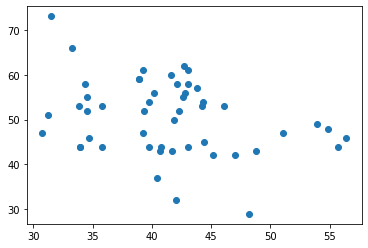

In [55]:
ejerudgifts=zip(y,price_per_meter)
ejerudgiftsliste=tuple(ejerudgifts)

import matplotlib.pyplot as plt
values1=[item[1] for item in ejerudgiftsliste]
labels1=[item[0] for item in ejerudgiftsliste]
plt.scatter(values1,labels1)

[]

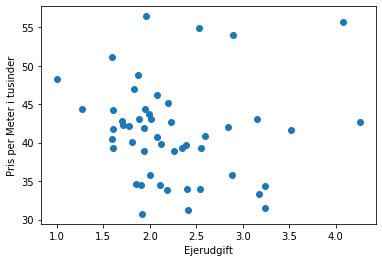

In [56]:
import matplotlib.pyplot as plt
values1=[z]
labels1=[price_per_meter]
plt.scatter(values1,labels1)
plt.xlabel("Ejerudgift")
plt.ylabel("Pris per Meter i tusinder")
plt.plot()

> **Supercharge:** Crawl over pages of Boliga to collect this data for the entire borough of Nørrebro. Or all of Copenhagen!

In [57]:
#In order to do this, we need to make it into a function!! - the whooole thing, wuhu
def scrapeboliga(urlinput):
        #we need to introduce BeautifulSoup, re and requests:
    from bs4 import BeautifulSoup
    import requests as rq
    urlstring=rq.get(urlinput).text
    urlsoup=BeautifulSoup(urlstring,"html.parser")

    #We need to get the information string for:
    #for each element, we need specific html->find_all with BS ->list ->append to a clear list
#FIRST PRIS
    prishtml=urlsoup.find_all(class_="primary-value d-flex justify-content-end")
    prisstring=str(prishtml)
    
    #define what string we are looking for in the chunk of html
    import re
    priskode=re.compile("(\s\d+?.\d+\.\d+)")
    
    #find the string:
    priser=priskode.findall(prisstring)
    
    #delete the dots
    udotspriser=str(priser)
    udot=udotspriser.replace(".","")
    
    #make it into a list of big numbers
    tal=re.compile("\d{7,8}")
    pricelist=tal.findall(udot)
    finalpricelist=[]
    for element in pricelist:
        talelement=int(element)
        finalpricelist.append(talelement)
    
    #we need to remove the first two (in order to end with 50)
    while len(finalpricelist)>50:
        finalpricelist.pop(0)
    
#THE SAME FOR METER:
    #find html specific code...
    html=urlsoup.find_all("app-house-details")
    meterstykke=[]
    for element in html:
        meterstykke.append(element.find_all("span")[1])
    
    #define what we are looking for:
    meter=re.compile("\d+?\s")
    meterstring=str(meterstykke)
    themeterlist=meter.findall(meterstring)
    finalmeterlist=[]
    for element in themeterlist:
        talelement=int(element)
        finalmeterlist.append(talelement)
    
    #We need to remove the first two (in order to end with 50)
    while len(finalmeterlist)>50:
        finalmeterlist.pop(0)

#EJERUDGIFT
    #we can just look in all of the html provided for the specific expression:
    ejerudgift=re.compile("(Ejerudgift: )(\d+?.\d+)")
    
    #let's look:
    urlsoupstring=str(urlsoup)
    ejerudgiftlist=ejerudgift.findall(urlsoupstring)
    ejerudgiftstring=str(ejerudgiftlist)
    
    #let's remove the dots:
    udendots=ejerudgiftstring.replace(".","")
    
    #let's get only the numbers:
    onlynumber=re.compile("\d{2,7}")
    ejerudgiftclean=onlynumber.findall(udendots)
    
    #and transform it to numbers:
    finalejerudgiftlist=[]
    for element in ejerudgiftclean:
        talelement=int(element)
        finalejerudgiftlist.append(talelement)
    
    
#ADRESS
    #find the address-htmlchunk:
    addresshtml=urlsoup.find_all(class_="w-100 mt-1 listing-address font-weight-bold text-nowrap text-truncate")    
    addresshtmlstring=str(addresshtml)
    
    #narrow down inside the htmlchunk - only addresses
    # we need to tell it that we will play around with it with BeautifulSoup
    adsoup=BeautifulSoup(addresshtmlstring,"html.parser")
    addresstext=adsoup.get_text()
    #so far so good - but it needs to be a list of addresses:
    addresslist=addresstext.split(" , ")
    #and it needs to be max 50, not 52
    while len(addresslist)>50:
        addresslist.pop(0)
    
    #Our output would be a dictionary of the three elements for each house assigned to adress
    #this means that the three things are going to be put together in a dict and returned as
    if len(addresslist)==len(finalpricelist)==len(finalejerudgiftlist)==len(finalmeterlist):
        tal=0
        dictionary_of_houses={}
        for element in addresslist:
            dictionary_of_houses[element]={"price":finalpricelist[tal],"size":finalmeterlist[tal],"ejerudgift":finalejerudgiftlist[tal]}
            tal+=1
            
        #here we want to extract the data to a csv-file called boligpris.csv
        import csv
        write=csv.writer(open("boligpris.csv","a"))
        for key,val in dictionary_of_houses.items():
            write.writerow([key,val])
        #everytime it works it prints 'succes!'
        print("Success!")
        return dictionary_of_houses
    #and everytime it fails it shows how the inputs don't match
    else:
            print("der er et ulige antal inputs:")
            print("adresser:",len(addresslist),"priser:",len(finalpricelist),"ejerudgifter:",len(finalejerudgiftlist),"størrelser:",len(finalmeterlist))

In [58]:
scrapeboliga("https://www.boliga.dk/resultat?propertyType=3&zipCodes=2200&page=2")

Success!


{' Dagmarsgade 28  4. 90.': {'price': 2690000, 'size': 59, 'ejerudgift': 3079},
 ' Fenrisgade 2, 3. tv.': {'price': 2699000, 'size': 62, 'ejerudgift': 2036},
 ' Tagensvej 56  5. th.': {'price': 2895000, 'size': 58, 'ejerudgift': 2709},
 ' Gormsgade 6, 1. 7.': {'price': 2895000, 'size': 83, 'ejerudgift': 2359},
 ' Allersgade 2, 1. mf.': {'price': 2895000, 'size': 70, 'ejerudgift': 3005},
 ' Prinsesse Charlottes Gade 5, 4. tv.': {'price': 2925000,
  'size': 57,
  'ejerudgift': 2490},
 ' Sorgenfrigade 8E, 1. 4': {'price': 2995000, 'size': 80, 'ejerudgift': 2975},
 ' Julius Bloms Gade 9, 5. 8': {'price': 2995000,
  'size': 65,
  'ejerudgift': 2467},
 ' Bjelkes Allé 34, 3. 41.': {'price': 2999000,
  'size': 59,
  'ejerudgift': 2029},
 ' Gormsgade 8, 2. 41': {'price': 3095000, 'size': 82, 'ejerudgift': 2746},
 ' Sigynsgade 46, 4. tv.': {'price': 3099000, 'size': 78, 'ejerudgift': 3525},
 ' Nørrebrogade 205, 3. tv': {'price': 3175000,
  'size': 65,
  'ejerudgift': 3021},
 ' Kronborggade 20, 1

In [59]:
b

NameError: name 'b' is not defined

In [ ]:
lilurl=re.sub("[^0-9]","","https://www.boliga.dk/resultat?propertyType=3&zipCodes=2200&page=2")

In [ ]:
lilurl

In [ ]:
#scrapeboliga("https://www.boliga.dk/resultat?propertyType=3&zipCodes=2200&page=3")

In [ ]:
#making a list of long urls
boligaurl="https://www.boliga.dk/resultat?area=1&page="
def lotsofurls(urlinput):
    i=0
    urls=[]
    areaurls=[]
    while i<50:
        i+=1
        urls.append(urlinput+str(i))
    for element in urls:
        areaurls.append(element+"&propertyType=3&sort=zipCode-a")
    return areaurls
    

In [ ]:
boligaoverload=lotsofurls(boligaurl)
boligaoverload

In [ ]:
dictionary={}
for element in boligaoverload:
    dictionary.update(scrapeboliga(element))

In [ ]:
len(dictionary)

In [ ]:
#going over all urls to get data (in total: 1500 elements into a csv-file!)

#this is too much!
#i=1
#dictionary={}
#keystr="key_".format(i)
#keystrr="key_".format(ii)
#for element in boligaoverload:
#    test=scrapeboliga(element)
#    if type(test)==dict:
  #      if dictionary=={}:
 #           dictionary=scrapeboliga(element)
   #     else:
    #        dictionarydob=scrapeboliga(element)
     #       if dictionarydob.keys()==dictionary.keys():
      #          ii=str(i)+"00"
       #         dictionarydob[keystrr]=dictionarydob.pop(keystr)
        #        dictionary.update(dictionarydob)
         #       i+=1
#
 #   else:
  #      print("no")
 #  "" 
#    a.update(b)
#dic2 = dict(dic0, **dic1)
#I just wanted to have a numerical order with a lot of dictionaries called key_i...

In [ ]:
import matplotlib.pyplot as plt
values=[dictionary[i]["size"] for i in dictionary]
labels=[dictionary[i]["price"] for i in dictionary]

plt.scatter(values,labels)
plt.xlabel("størrelse")
plt.ylabel("prisen")
plt.plot()

In [ ]:
#dictionary.values()

# For sjov koderne

In [ ]:
result = {}
for j in range(10):
    key_j = 'key_{}'.format(j)  # a string depending on j
    result[key_j] = str(j)+" hello"

In [ ]:
result

In [ ]:
        if len(dictionary)<=50:
            omgang=0
            dictionary+"1"={}
            omgang+=1
            key=
            if key in dictionary.keys()
                
            if tal in dictionary_of_houses.keys():
                #adressen er kategorien:
                #i er tallet
                #we also want to know a bit about the output and give it a specific name
                dictionary_of_houses[tal+"ekstra"]={"address":element,"price":finalpricelist[tal],"size":finalmeterlist[tal],"ejerudgift":finalejerudgiftlist[tal]}
                tal+=1
            dictionary.update(scrapeboliga(element))

# For alvor koderne

In [ ]:
boligaurlmega="https://www.boliga.dk/resultat?propertyType=3&page="
def ahellalotsofurls(urlinput):
    i=0
    urlss=[]
    while i<127:
        i+=1
        urlss.append(urlinput+str(i))
    return urlss

In [ ]:
altboliga=ahellalotsofurls(boligaurlmega)

In [ ]:
type(altboliga)

In [ ]:
#crazydic={}
#fail=0
#for element in altboliga:
 #   test=scrapeboliga(element)
#    if type(test)==dict:
 #       crazydic.update(scrapeboliga(element))
  #  else:
   #     fail+=1
    #    print(fail,"fail!")

In [ ]:
len(crazydic)

In [60]:
import pandas as pd
crazyfile=open("boligpris 18.31.35.csv","r")

In [69]:
pandaboliga=pd.DataFrame(crazyfile)

In [70]:
pandaboliga.columns

Index([], dtype='object')

In [65]:
boligabiglist=list(pandaboliga)

In [67]:
import matplotlib.pyplot as plt
labels=[pandaboliga[i]["size"] for i in pandaboliga]
values=[pandaboliga[i]["ejerudgift"] for i in pandaboliga]
plt.figure(figsize=(30,20), dpi=120)
plt.scatter(labels,values)
plt.xlabel("størrelse")
plt.ylabel("pris")
plt.plot()

KeyError: '"[ Kongens Nytorv 21, 3. tv.","{\'price\': 15995000, \'size\': 280, \'ejerudgift\': 19794}"\n'